<a href="https://colab.research.google.com/github/Dildarshahshah/pca-visualization/blob/main/K_Means_%2B_Elbow_%2B_t_SNE_%2B_Centroids_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (150, 4)


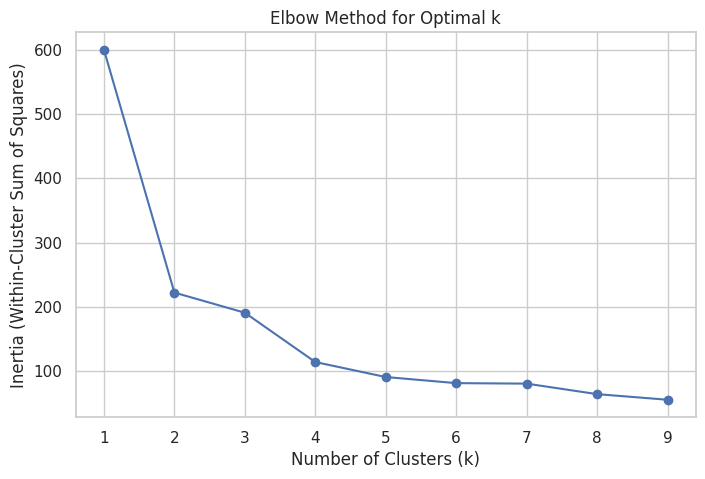

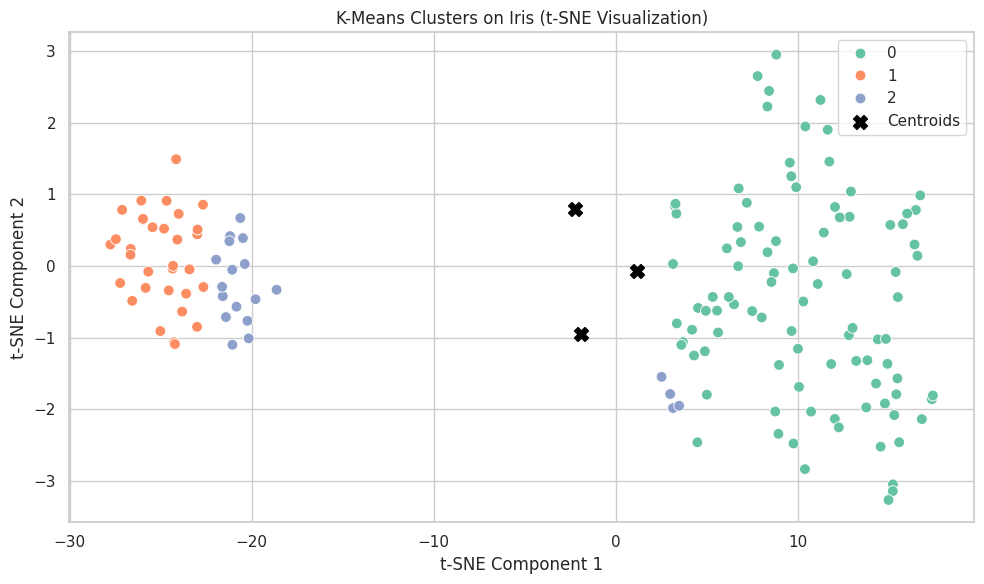

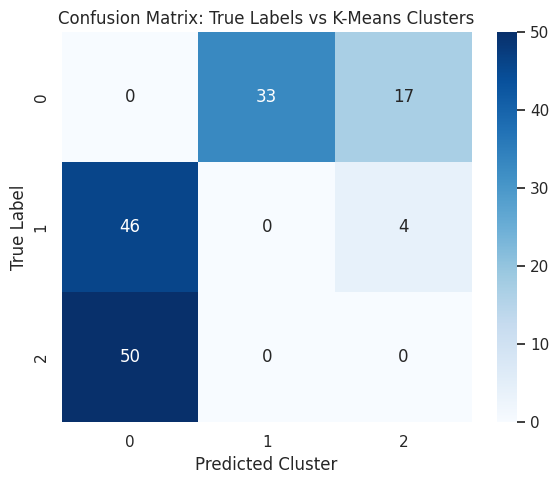

Silhouette Score: 0.480


In [2]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

print("Data shape:", X.shape)  # (150, 4)

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K)
plt.grid(True)
plt.show()

# Step 5: Run K-Means with optimal k=3 (we know Iris has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Step 6: Visualize using t-SNE (nonlinear dimensionality reduction)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Step 7: Plot t-SNE Clusters with centroids (projected to t-SNE space using PCA)
# (KMeans centroids are not in t-SNE space, so we project via PCA as an approximation)
pca_for_centroids = PCA(n_components=2)
centroids_2d = pca_for_centroids.fit(X_scaled).transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='Set2', s=60)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title("K-Means Clusters on Iris (t-SNE Visualization)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Compare clusters with true labels using a confusion matrix
conf_mat = confusion_matrix(y, clusters)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs K-Means Clusters")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Step 9: Optional – Evaluate using silhouette score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")
